<a href="https://colab.research.google.com/github/AmirGhnbr/statistical_time_series_analysis/blob/main/statistical_time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q seaborn arch yfinance scikit-learn pmdarima mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 6.0 MB/s eta 0:00:00


In [2]:
!pip install git+https://github.com/statsmodels/statsmodels

  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-_jt8mtag
  Running command git clone --filter=blob:none --quiet https://github.com/statsmodels/statsmodels /tmp/pip-req-build-_jt8mtag
  Resolved https://github.com/statsmodels/statsmodels to commit 3b61c469ed8d4a6752b5bf01390789512f81f0c6
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for statsmodels: filename=statsmodels-0.15.0.dev44+g3b61c469e-cp310-cp310-linux_x86_64.whl size=23252607 sha256=8ffdc7ed3dd170ba90c0e230f566855d4c954edbfa9ec3a9857fe2130c655887
  Stored in directory: /tmp/pip-ephem-wheel-cache-2_y7fw1p/wheels/80/42/7e/512a0e0b733106dec3d046d1f77208d4f64f601a266ad861dc
Successfully built statsmodels
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.5
    Uninstalling statsmodels-0.13.5:
      Successfully uninstalled s

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import mplfinance as mplf
import matplotlib.pyplot as plt

In [4]:
data = yf.download('BTC-USD',
                   period='9mo',
                   interval='1d',
                   progress=False)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-06,20161.039062,20408.392578,19900.087891,19955.443359,19955.443359,34711412966
2022-10-07,19957.558594,20041.085938,19395.792969,19546.849609,19546.849609,29227315390
2022-10-08,19546.328125,19601.695312,19299.414062,19416.568359,19416.568359,16437423167
2022-10-09,19417.478516,19542.539062,19349.259766,19446.425781,19446.425781,16837262532
2022-10-10,19446.416016,19515.466797,19102.978516,19141.484375,19141.484375,27425022774
...,...,...,...,...,...,...
2023-07-02,30587.269531,30766.140625,30264.019531,30620.769531,30620.769531,10533418042
2023-07-03,30624.515625,31375.613281,30586.513672,31156.439453,31156.439453,15271884873
2023-07-04,31156.865234,31325.197266,30659.355469,30777.582031,30777.582031,12810828427


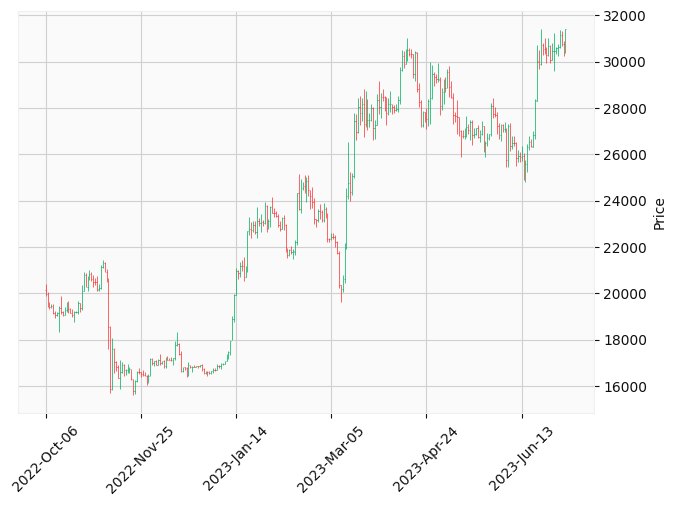

In [5]:
mplf.plot(data, style='yahoo',warn_too_much_data=10000)

### Trying to decompose the non-stationary btc data using stl

In [6]:
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

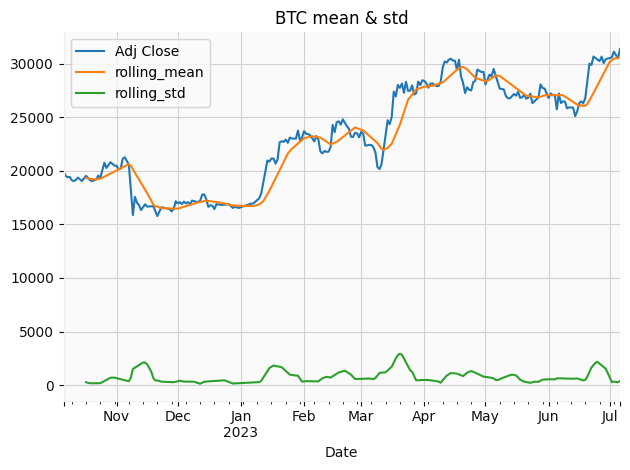

In [7]:
WINDOW_SIZE = 12
data["rolling_mean"] = data["Adj Close"].rolling(window=WINDOW_SIZE).mean()
data["rolling_std"] = data["Adj Close"].rolling(window=WINDOW_SIZE).std()
data[['Adj Close','rolling_mean','rolling_std']].plot(title="BTC mean & std")

sns.despine()
plt.tight_layout()

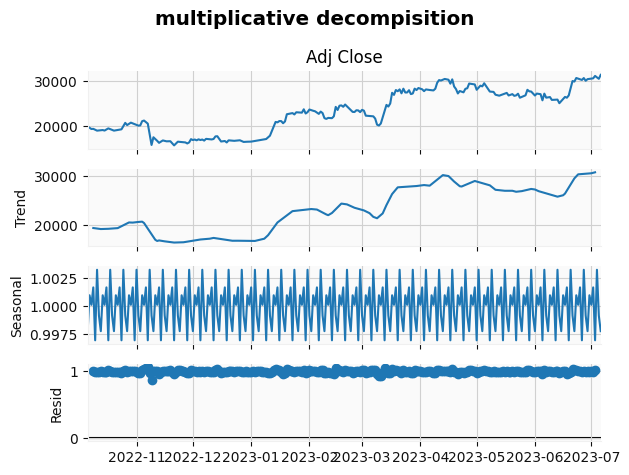

In [8]:
decomposition_res = seasonal_decompose(data['Adj Close'],model='multiplicative')

(
    decomposition_res
    .plot()
    .suptitle('multiplicative decompisition')
)
sns.despine()
plt.tight_layout()

### Let's do STL ans mstl decomposition

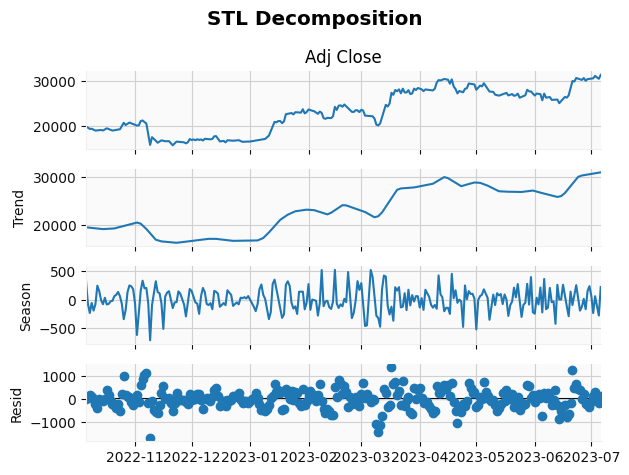

In [9]:
from statsmodels.tsa.seasonal import STL

stl_decomposition = STL(data["Adj Close"]).fit()
stl_decomposition.plot() \
                 .suptitle("STL Decomposition")

sns.despine()
plt.tight_layout()

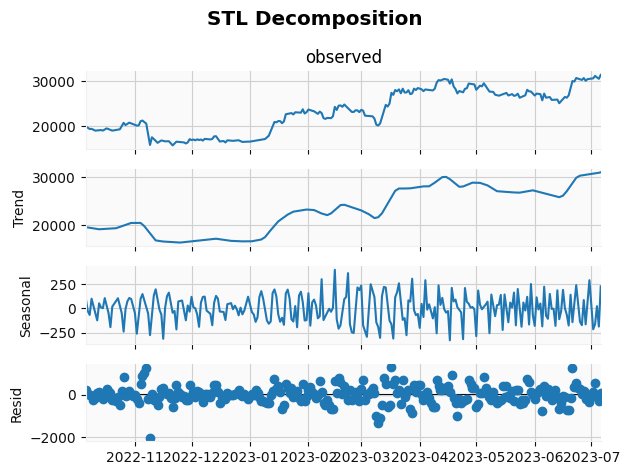

In [10]:
from statsmodels.tsa.seasonal import MSTL

stl_decomposition = MSTL(data["Adj Close"]).fit()
stl_decomposition.plot() \
                 .suptitle("STL Decomposition")

sns.despine()
plt.tight_layout()

## Apply hodrick-prescott filter

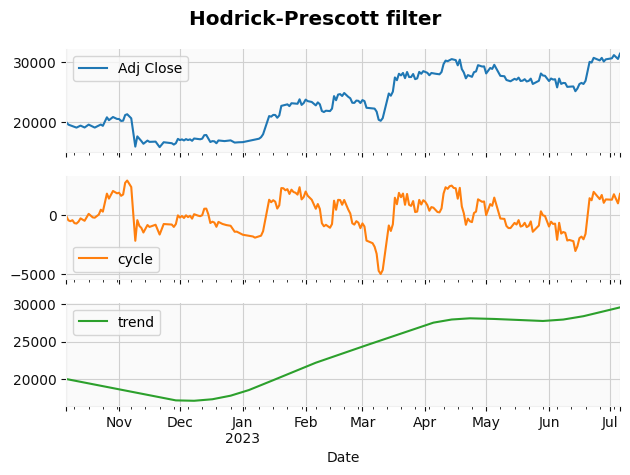

In [11]:
from statsmodels.tsa.filters.hp_filter import hpfilter

hp_df = data[["Adj Close"]].copy()
hp_df["cycle"], hp_df["trend"] = hpfilter(hp_df["Adj Close"], 129600)
hp_df.plot(subplots=True, title="Hodrick-Prescott filter");

sns.despine()
plt.tight_layout()

As you see BTC was finished a down trend in Dec and start new uptrend in Jan, and that trend finished in May , now new uptrend in BTC started at Jul as it was in Jan, expecting to have another 3.5 month uptrend

## Testing for Stationary in time series

Implement:

* Augmented Dickey-Fuller(ADF) test
* Kwiatkowski-philips-Schmidt-Shin (KPSS) test

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss

> A unit root is a feature of a time series that makes it non-stationary, meaning that its statistical properties change over time.

> The ADF test is commonly used in econometrics and finance to test for the presence of a trend in a time series dataset. The null hypothesis of the ADF test is that the time series has a unit root, meaning that it is non-stationary.

In [13]:
def adf_test(x):
  indeces = ["Test Statistic", "p-value","# of Lags Used", "# of Observations Used"]

  adf_test = adfuller(x, autolag='AIC')
  results = pd.Series(adf_test[0:4],index = indeces)
  for key, value in adf_test[4].items():
    results[f"Critical Value ({key})"] = value
  return results

In [14]:
adf_test(data['Adj Close'])

Test Statistic             -0.423481
p-value                     0.906104
# of Lags Used              0.000000
# of Observations Used    273.000000
Critical Value (1%)        -3.454533
Critical Value (5%)        -2.872186
Critical Value (10%)       -2.572443
dtype: float64

the p-value in greater than the threshold value (0.05)

In [15]:
def kpss_test(x, h0_type="c"):
 indices = ["Test Statistic", "p-value", "# of Lags"]
 kpss_test = kpss(x, regression=h0_type);
 results = pd.Series(kpss_test[0:3], index=indices)

 for key, value in kpss_test[3].items():
    results[f"Critical Value ({key})"] = value
 return results

In [16]:
kpss_test(data['Adj Close'])

<ipython-input-15-ca4edb5552cd>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(x, regression=h0_type);


Test Statistic            2.187712
p-value                   0.010000
# of Lags                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64

* The null hypothesis of the kpss test states that the time series is stationary. With a p-value of 0.01 (less than the threshold 0.05) which rejects the hypothesis => time series is non-stationary


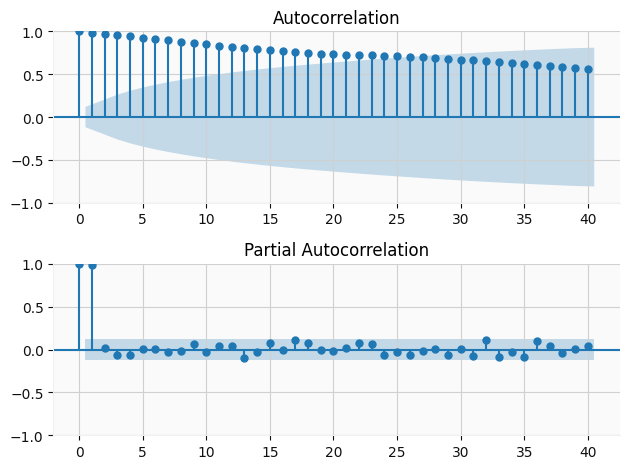

In [17]:
def plot_acf_pacf(data):
    N_LAGS= 40
    SIGNIFICANCE_LEVEL = 0.05

    fig, ax = plt.subplots(2, 1)
    plot_acf(data, ax=ax[0],lags=N_LAGS,
    alpha=SIGNIFICANCE_LEVEL);
    plot_pacf(data, ax=ax[1],lags=N_LAGS,
    alpha=SIGNIFICANCE_LEVEL);

    sns.despine()
    plt.tight_layout()


plot_acf_pacf(data['Adj Close'])

### Zivot Andrews test

In [18]:
from arch.unitroot import ZivotAndrews
za = ZivotAndrews(data['Adj Close'])
print(za.summary().as_text())

        Zivot-Andrews Results        
Test Statistic                 -3.249
P-value                         0.819
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -5.28 (1%), -4.81 (5%), -4.57 (10%)
Null Hypothesis: The process contains a unit root with a single structural break.
Alternative Hypothesis: The process is trend and break stationary.


## Make time series stationary

Calculating the log-return of the data will make it a stationary

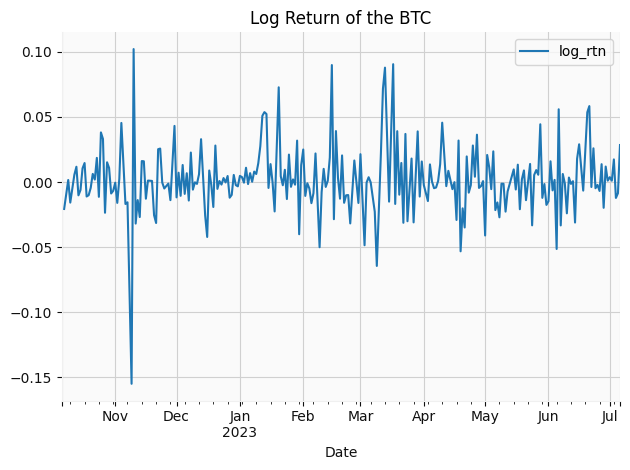

In [19]:
data['log_rtn']=np.log(data['Adj Close']/data['Adj Close'].shift(1))

(
    data.loc[:,['log_rtn']]
    .plot(title='Log Return of the BTC')
)
sns.despine()
plt.tight_layout()

In [20]:
from arch.unitroot import ADF
adf=ADF(data['log_rtn'].dropna())
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -15.872
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [21]:
adf_test(data['log_rtn'].dropna())

Test Statistic           -1.587219e+01
p-value                   8.955117e-29
# of Lags Used            0.000000e+00
# of Observations Used    2.720000e+02
Critical Value (1%)      -3.454622e+00
Critical Value (5%)      -2.872225e+00
Critical Value (10%)     -2.572464e+00
dtype: float64

In [22]:
kpss_test(data['log_rtn'].dropna())

<ipython-input-15-ca4edb5552cd>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(x, regression=h0_type);


Test Statistic           0.114777
p-value                  0.100000
# of Lags                3.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

the data is now stationary

## Modeling time series with exponential smoothing methods

In [23]:
from statsmodels.tsa.holtwinters import (ExponentialSmoothing,
                                         SimpleExpSmoothing,
                                         Holt)

In [42]:
train_size = int(0.8 * len(data['Adj Close'].dropna()))
test_len = len(data['Adj Close'].dropna())-train_size
df_train = data['Adj Close'].dropna().iloc[:train_size]
df_test = data['Adj Close'].dropna().iloc[train_size:]

In [43]:
ses_1 = SimpleExpSmoothing(df_train).fit(smoothing_level=0.5)
ses_forecast_1 = ses_1.forecast(test_len);

ses_2 = SimpleExpSmoothing(df_train).fit()
ses_forecast_2 = ses_2.forecast(test_len);

ses_1.params_formatted

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


,name,param,optimized
smoothing_level,alpha,0.500000,False
initial_level,l.0,19955.443359,False


In [44]:
ses_1.summary()

Dep. Variable:,Adj Close,No. Observations:,219
Model:,SimpleExpSmoothing,SSE,112248615.982
Optimized:,False,AIC,2883.227
Trend:,None,BIC,2890.005
Seasonal:,None,AICC,2883.414
Seasonal Periods:,None,Date:,"Thu, 06 Jul 2023"
Box-Cox:,False,Time:,09:45:12
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,False
initial_level,19955.443,l.0,False


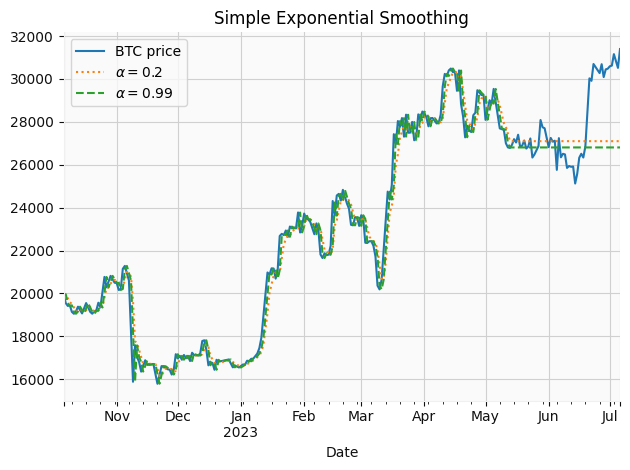

In [78]:
ses_df = data.copy()
ses_df["ses_1"] = pd.concat([ses_1.fittedvalues,ses_forecast_1])
ses_df["ses_2"] = pd.concat([ses_2.fittedvalues,ses_forecast_2])

opt_alpha = ses_2.model.params["smoothing_level"]

fig, ax = plt.subplots()
ses_df[['Adj Close','ses_1','ses_2']].plot(style=["-",":","--"], ax=ax,
                     title="Simple Exponential Smoothing")
labels = [
    "BTC price",
    r"$\alpha=0.2$",
    r"$\alpha={0:.2f}$".format(opt_alpha),
]
ax.legend(labels)

sns.despine()
plt.tight_layout()

fit 3 varriants of HOLT's linear trend model and create forecast

In [65]:
# Holt's model with linear trend
hs_1 = Holt(df_train).fit()
hs_forecast_1 = hs_1.forecast(test_len)

# Holt's model with exponential trend
hs_2 = Holt(df_train, exponential=True).fit()
# equivalent to ExponentialSmoothing(df_train, trend="mul").fit()
hs_forecast_2 = hs_2.forecast(test_len)

# Holt's model with exponential trend and damping
hs_3 = Holt(df_train, exponential=False,
            damped_trend=True).fit()
hs_forecast_3 = hs_3.forecast(test_len)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [66]:
hs_3.params_formatted

,name,param,optimized
smoothing_level,alpha,0.995000,True
smoothing_trend,beta,0.047381,True
initial_level,l.0,19955.443359,False
initial_trend,b.0,-404.507812,False
damping_trend,phi,0.990000,True


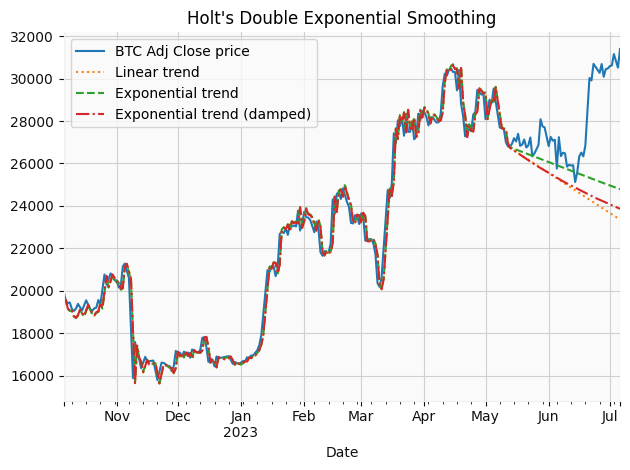

In [77]:
hs_df = data.copy()
hs_df["hs_1"] = pd.concat([hs_1.fittedvalues,hs_forecast_1])
hs_df["hs_2"] = pd.concat([hs_2.fittedvalues,hs_forecast_2])
hs_df["hs_3"] = pd.concat([hs_3.fittedvalues,hs_forecast_3])

fig, ax = plt.subplots()
hs_df[['Adj Close','hs_1','hs_2','hs_3']].plot(style=["-",":","--", "-."], ax=ax,
                    title="Holt's Double Exponential Smoothing")
labels = [
    "BTC Adj Close price",
    "Linear trend",
    "Exponential trend",
    "Exponential trend (damped)",
]
ax.legend(labels)

sns.despine()
plt.tight_layout()

In [70]:
SEASONAL_PERIODS = 7

# Holt-Winters' model with exponential trend
hw_1 = ExponentialSmoothing(df_train,
                            trend="mul",
                            seasonal="add",
                            seasonal_periods=SEASONAL_PERIODS).fit()
hw_forecast_1 = hw_1.forecast(test_len)

# Holt-Winters' model with exponential trend and damping
hw_2 = ExponentialSmoothing(df_train,
                            trend="mul",
                            seasonal="add",
                            seasonal_periods=SEASONAL_PERIODS,
                            damped_trend=True).fit()
hw_forecast_2 = hw_2.forecast(test_len)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [71]:
hw_2.params_formatted

,name,param,optimized
smoothing_level,alpha,0.995000,True
smoothing_trend,beta,0.035536,True
smoothing_seasonal,gamma,0.005000,True
initial_level,l.0,19311.622675,True
initial_trend,b.0,0.999499,True
damping_trend,phi,0.990000,True
initial_seasons.0,s.0,-185.469119,True
initial_seasons.1,s.1,54.400022,True
initial_seasons.2,s.2,141.690828,True
initial_seasons.3,s.3,214.238680,True


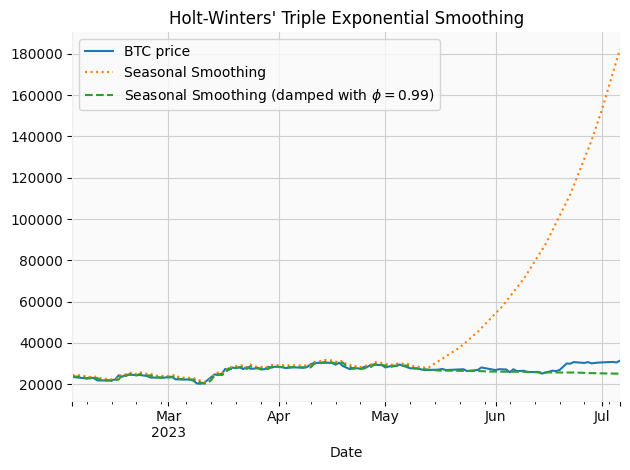

In [79]:
hw_df = data.copy()
hw_df["hw_1"] = pd.concat([hw_1.fittedvalues,hw_forecast_1])
hw_df["hw_2"] = pd.concat([hw_2.fittedvalues,hw_forecast_2])

fig, ax = plt.subplots()
hw_df = hw_df[hw_df.index>'2023-02']
hw_df[['Adj Close','hw_1','hw_2']].plot(
    style=["-",":","--"], ax=ax,
    title="Holt-Winters' Triple Exponential Smoothing"
)
phi = hw_2.model.params["damping_trend"]

labels = [
    "BTC price",
    "Seasonal Smoothing",
    f"Seasonal Smoothing (damped with $\phi={phi:.2f}$)"
]
ax.legend(labels)

sns.despine()
plt.tight_layout()